In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [3]:
justice_df=pd.read_csv('justice.csv')
justice_df.head(5)

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,Jane Roe,Henry Wade,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,NaN
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment


In [4]:
justice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          3303 non-null   int64 
 1   ID                  3303 non-null   int64 
 2   name                3303 non-null   object
 3   href                3303 non-null   object
 4   docket              3303 non-null   object
 5   term                3303 non-null   object
 6   first_party         3302 non-null   object
 7   second_party        3302 non-null   object
 8   facts               3303 non-null   object
 9   facts_len           3303 non-null   int64 
 10  majority_vote       3303 non-null   int64 
 11  minority_vote       3303 non-null   int64 
 12  first_party_winner  3288 non-null   object
 13  decision_type       3296 non-null   object
 14  disposition         3231 non-null   object
 15  issue_area          3161 non-null   object
dtypes: int64(5), object(11)


In [5]:
justice_df['disposition'].value_counts()

reversed/remanded            1073
affirmed                     1007
reversed                      585
vacated/remanded              430
reversed in-part/remanded      61
none                           41
reversed in-part               22
vacated                         7
vacated in-part/remanded        5
Name: disposition, dtype: int64

In [6]:
justice_df['decision_type'].value_counts()

majority opinion                     2829
per curiam                            267
plurality opinion                     153
equally divided                        17
dismissal - rule 46                     9
dismissal - other                       8
dismissal - improvidently granted       6
dismissal - moot                        5
memorandum                              1
opinion of the court                    1
Name: decision_type, dtype: int64

**데이터 전처리**

In [7]:
justice_df.dropna(inplace=True)
justice_df.info()
justice_df.reset_index(drop=True, inplace=True)
justice_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3098 entries, 1 to 3302
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          3098 non-null   int64 
 1   ID                  3098 non-null   int64 
 2   name                3098 non-null   object
 3   href                3098 non-null   object
 4   docket              3098 non-null   object
 5   term                3098 non-null   object
 6   first_party         3098 non-null   object
 7   second_party        3098 non-null   object
 8   facts               3098 non-null   object
 9   facts_len           3098 non-null   int64 
 10  majority_vote       3098 non-null   int64 
 11  minority_vote       3098 non-null   int64 
 12  first_party_winner  3098 non-null   object
 13  decision_type       3098 non-null   object
 14  disposition         3098 non-null   object
 15  issue_area          3098 non-null   object
dtypes: int64(5), object(11)


,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
1,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
2,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
3,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment
4,5,50644,Kleindienst v. Mandel,https://api.oyez.org/cases/1971/71-16,71-16,1971,"Richard G. Kleindienst, Attorney General of th...","Ernest E. Mandel, et al.",<p>Ernest E. Mandel was a Belgian professional...,2282,6,3,True,majority opinion,reversed,First Amendment


In [8]:
#영문자가 아닌 것은 공백으로 대체
import re
justice_df['facts']=justice_df['facts'].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))

In [9]:
justice_target=justice_df['first_party_winner']
justice_fact=justice_df['facts']
justice_encode=justice_df[['decision_type', 'disposition']]

In [10]:
#if true means that the first party won, and if false it means that the second party won.
encoder=LabelEncoder()
labels=encoder.fit_transform(justice_target)
df_target=pd.DataFrame(labels, columns=['first_party_winner'])
display(df_target)

,first_party_winner
0,1
1,1
2,1
3,1
4,1
...,...
3093,1
3094,1
3095,0
3096,1


In [11]:
#텍스트 전처리
from nltk import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stopwords=nltk.corpus.stopwords.words('english')

lemma=WordNetLemmatizer()

def preprocess(data):
  for i, text in enumerate(data):
    text=str(text)
    sentences=sent_tokenize(text=text)
    filtered_words=[]
    for sentence in sentences:
      words=word_tokenize(sentence)
      for word in words:
        word=word.lower()
        if word not in stopwords:
          lemma.lemmatize(word)
          filtered_words.append(word)
    text=" ".join(filtered_words[1:])
    data[i]=text
  return data

preprocess(justice_fact)
display(justice_fact.head(5))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-11-51ae085b96ef>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=text


0    joan stanley three children peter stanley stan...
1    john giglio convicted passing forged money ord...
2    idaho probate code specified males must prefer...
3    miller conducting mass mailing campaign advert...
4    ernest e mandel belgian professional journalis...
Name: facts, dtype: object

In [12]:
df=pd.concat([justice_fact, justice_encode, df_target], axis=1)
X=df[['facts', 'decision_type', 'disposition']]
y=df['first_party_winner']
df_backup=df.copy()
df

,facts,decision_type,disposition,first_party_winner
0,joan stanley three children peter stanley stan...,majority opinion,reversed/remanded,1
1,john giglio convicted passing forged money ord...,majority opinion,reversed/remanded,1
2,idaho probate code specified males must prefer...,majority opinion,reversed/remanded,1
3,miller conducting mass mailing campaign advert...,majority opinion,vacated/remanded,1
4,ernest e mandel belgian professional journalis...,majority opinion,reversed,1
...,...,...,...,...
3093,century alaska purchase federal government set...,majority opinion,reversed/remanded,1
3094,refugio palomar santiago mexican national gran...,majority opinion,reversed/remanded,1
3095,tarahrick terry pleaded guilty one count posse...,majority opinion,affirmed,0
3096,joshua james cooley parked pickup truck side r...,majority opinion,vacated/remanded,1


In [13]:
#피처 간 상관관계가 있는지 확인
df.groupby(['first_party_winner'])['decision_type'].value_counts()

first_party_winner  decision_type                    
0                   majority opinion                      927
                    plurality opinion                      65
                    per curiam                             22
                    equally divided                        12
                    dismissal - improvidently granted       3
                    dismissal - other                       2
1                   majority opinion                     1796
                    per curiam                            189
                    plurality opinion                      80
                    dismissal - moot                        1
                    opinion of the court                    1
Name: decision_type, dtype: int64

In [14]:
df.groupby(['first_party_winner'])['disposition'].value_counts()
#관계가 있다!! first_party는 어쨌든 재판을 신청한 쪽임!

first_party_winner  disposition              
0                   affirmed                      951
                    vacated/remanded               29
                    reversed in-part/remanded      18
                    reversed/remanded              10
                    none                            9
                    reversed in-part                7
                    reversed                        6
                    vacated in-part/remanded        1
1                   reversed/remanded            1040
                    reversed                      556
                    vacated/remanded              387
                    reversed in-part/remanded      43
                    affirmed                       15
                    reversed in-part               12
                    vacated                         6
                    none                            4
                    vacated in-part/remanded        4
Name: disposition, dtype: int64

In [15]:
#피처 벡터화(count 기반)
cnt_vec=CountVectorizer()
X_facts=cnt_vec.fit_transform(df['facts'])

X_facts=X_facts.todense()
df_vec=pd.DataFrame(data=X_facts) #columns=cnt_vec.get_feature_names_out()
df_vec

,0,1,2,3,4,5,6,7,8,9,...,18389,18390,18391,18392,18393,18394,18395,18396,18397,18398
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#피처 벡터화(TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec=TfidfVectorizer()
X_facts_tf=tfidf_vec.fit_transform(df['facts'])
X_facts_tf=X_facts_tf.todense()
df_vec_tf=pd.DataFrame(data=X_facts_tf)
df_vec_tf

,0,1,2,3,4,5,6,7,8,9,...,18389,18390,18391,18392,18393,18394,18395,18396,18397,18398
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
#원-핫 인코딩으로 나머지 피처 2개의 형식 맞춰주기
df_encode1=pd.get_dummies(df['decision_type'])
df_encode2=pd.get_dummies(df['disposition'])
df_encode2

,affirmed,none,reversed,reversed in-part,reversed in-part/remanded,reversed/remanded,vacated,vacated in-part/remanded,vacated/remanded
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3093,0,0,0,0,0,1,0,0,0
3094,0,0,0,0,0,1,0,0,0
3095,1,0,0,0,0,0,0,0,0
3096,0,0,0,0,0,0,0,0,1


In [18]:
df_last=pd.concat([df_vec, df_encode1, df_encode2, df['first_party_winner']], axis=1)
df_last.columns=df_last.columns.astype(str)
df_last

,0,1,2,3,4,5,6,7,8,9,...,affirmed,none,reversed,reversed in-part,reversed in-part/remanded,reversed/remanded,vacated,vacated in-part/remanded,vacated/remanded,first_party_winner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3095,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [19]:
#tf-idf
df_last_tf=pd.concat([df_vec_tf, df_encode1, df_encode2, df['first_party_winner']], axis=1)
df_last_tf.columns=df_last_tf.columns.astype(str)
df_last_tf

,0,1,2,3,4,5,6,7,8,9,...,affirmed,none,reversed,reversed in-part,reversed in-part/remanded,reversed/remanded,vacated,vacated in-part/remanded,vacated/remanded,first_party_winner
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
3094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
3095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1


**예측 및 평가**

In [20]:
X_features=df_last.drop(columns=['first_party_winner'])
y_labels=df_last['first_party_winner']
X_train, X_test, y_train, y_test=train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

In [21]:
X_features_tf=df_last_tf.drop(columns=['first_party_winner'])
y_labels_tf=df_last_tf['first_party_winner']
X_train_tf, X_test_tf, y_train_tf, y_test_tf=train_test_split(X_features_tf, y_labels_tf, test_size=0.2, random_state=156)

In [22]:
def model_train_predict(model, X_train, X_test, y_train):
  model.fit(X_train, y_train)
  preds=model.predict(X_test)

  return preds

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
  accuracy=accuracy_score(y_test, pred)
  precision=precision_score(y_test, pred)
  recall=recall_score(y_test, pred)
  f1=f1_score(y_test, pred)

  print('정확도: {0:.4f},정밀도: {1:.4f},재현율: {2:.4f}, F1: {3:.4f} \n'.format(accuracy, precision, recall,f1))

In [24]:
from sklearn.model_selection import GridSearchCV

def param_tuning(model, params, xtrain, ytrain):
  grid_cv=GridSearchCV(model, param_grid=params, cv=3)
  grid_cv.fit(xtrain, ytrain)
  print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
  print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [25]:
def verify(model, features, labels):
  scores=cross_val_score(model, features, labels, scoring='accuracy', cv=3)
  print('교차 검증별 정확도: \n', np.round(scores, 4))
  print('평균 검증 정확도:', np.round(np.mean(scores), 4))

**LDA를 통한 토픽 모델링**

In [46]:
"""
from sklearn.decomposition import LatentDirichletAllocation

lda=LatentDirichletAllocation(n_components=200, random_state=0)
lda_data=lda.fit_transform(X_train)
print(lda_data)
lda.components_
"""

[[5.20833333e-05 5.20833333e-05 5.20833333e-05 ... 5.20833333e-05
  5.20833333e-05 5.20833333e-05]
 [4.90196078e-05 4.90196078e-05 7.04136169e-01 ... 4.90196078e-05
  4.90196078e-05 4.90196078e-05]
 [7.35294118e-05 9.85367395e-01 7.35294118e-05 ... 7.35294118e-05
  7.35294118e-05 7.35294118e-05]
 ...
 [5.26315789e-05 5.26315789e-05 5.26315789e-05 ... 5.26315789e-05
  5.26315789e-05 5.26315789e-05]
 [8.06451613e-05 8.06451613e-05 8.06451613e-05 ... 8.06451613e-05
  8.06451613e-05 8.06451613e-05]
 [2.38095238e-05 2.38095238e-05 2.38095238e-05 ... 2.38095238e-05
  2.38095238e-05 2.38095238e-05]]


array([[5.00000000e-03, 5.00000000e-03, 5.00000000e-03, ...,
        5.00000000e-03, 5.00000000e-03, 5.00000000e-03],
       [5.00000000e-03, 5.00000000e-03, 5.00000000e-03, ...,
        5.00000000e-03, 5.00000000e-03, 3.48279516e+00],
       [5.00000000e-03, 5.00000000e-03, 5.00000000e-03, ...,
        5.00000000e-03, 5.00000000e-03, 1.92903234e+00],
       ...,
       [5.00000000e-03, 5.00000000e-03, 5.00000000e-03, ...,
        5.00000000e-03, 1.00500000e+00, 1.81845013e+00],
       [5.00000000e-03, 5.00000000e-03, 5.00000000e-03, ...,
        5.00000000e-03, 5.00000000e-03, 5.65805835e+00],
       [5.00000000e-03, 5.00000000e-03, 5.00000000e-03, ...,
        5.00000000e-03, 5.00000000e-03, 1.55258872e+00]])

In [47]:
#lda_data.shape #lda_data는 각 사건이 토픽1, 토픽 2에 할당될 확률을 갖고 있는듯!

(2478, 200)

In [48]:
#X_train_lda=pd.DataFrame(data=lda_data)
#X_test_lda=pd.DataFrame(data=lda.transform(X_test))

In [49]:
#lda_tf=LatentDirichletAllocation(n_components=2, random_state=0)
#lda_data_tf=lda_tf.fit_transform(X_train_tf)

In [51]:
#X_train_lda_tf=pd.DataFrame(data=lda_data_tf)
#X_test_lda_tf=pd.DataFrame(data=lda_tf.transform(X_test_tf))

In [52]:
#display(X_train_lda)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,...,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052
1,0.000049,0.000049,0.704136,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,...,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049
2,0.000074,0.985367,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,...,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074
3,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,...,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037
4,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,...,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050,...,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050
2474,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,...,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035
2475,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,...,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053
2476,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,...,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081


**분류를 통한 예측(지도학습)**

In [55]:
#랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(random_state=156)
preds=model_train_predict(rf_clf, X_train, X_test, y_train)
get_clf_eval(y_test, preds)

params={
    'max_depth':[8, 16, 24],
    'min_samples_leaf':[1, 6, 12],
    'min_samples_split':[2, 8, 16]
}
param_tuning(rf_clf, params, X_train, y_train)

정확도: 0.9629,정밀도: 0.9585,재현율: 0.9881, F1: 0.9731 

최적 하이퍼 파라미터: 
 {'max_depth': 24, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도: 0.7050


정확도: 0.9613,정밀도: 0.9584,재현율: 0.9857, F1: 0.9719 



"\nparams={\n    'max_depth':[8, 16, 24],\n    'min_samples_leaf':[1, 6, 12],\n    'min_samples_split':[2, 8, 16]\n}\nparam_tuning(rf_clf_tf, params, X_train_tf, y_train_tf)\n"

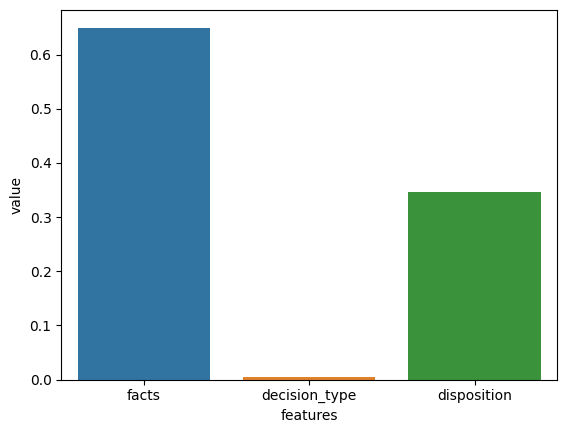

In [62]:
import seaborn as sns

rf_clf_tf=RandomForestClassifier(random_state=156)
preds_tf=model_train_predict(rf_clf_tf, X_train_tf, X_test_tf, y_train_tf)
get_clf_eval(y_test_tf, preds_tf)

#피처 중요도 확인 ㄷㄷㄷㄷ 존나 중요!!!
importance=rf_clf_tf.feature_importances_
facts_importance=sum(importance[0:18399])
decision_type_importance=sum(importance[18399:18407])
disposition_importance=sum(importance[18407:18416])

importance_df=pd.DataFrame({'features': ['facts', 'decision_type', 'disposition'],
                            'value': [facts_importance, decision_type_importance, disposition_importance]})
sns.barplot(x='features', y='value', data=importance_df)

"""
params={
    'max_depth':[8, 16, 24],
    'min_samples_leaf':[1, 6, 12],
    'min_samples_split':[2, 8, 16]
}
param_tuning(rf_clf_tf, params, X_train_tf, y_train_tf)
"""

In [63]:
#xgboost
from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
preds=model_train_predict(xgb_wrapper, X_train, X_test, y_train)
get_clf_eval(y_test, preds)


정확도: 0.9629,정밀도: 0.9628,재현율: 0.9834, F1: 0.9730 



In [65]:
xgb_wrapper_tf=XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
preds=model_train_predict(xgb_wrapper_tf, X_train_tf, X_test_tf, y_train_tf)
get_clf_eval(y_test_tf, preds)

정확도: 0.9645,정밀도: 0.9629,재현율: 0.9857, F1: 0.9742 



In [66]:
#lightgbm

from lightgbm import LGBMClassifier, plot_importance

lgbm_wrapper=LGBMClassifier(n_estimators=400, learning_rate=0.05)
lgbm_preds=model_train_predict(lgbm_wrapper, X_train, X_test, y_train)
get_clf_eval(y_test, lgbm_preds)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1646, number of negative: 832
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7136
[LightGBM] [Info] Number of data points in the train set: 2478, number of used features: 1714
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.664245 -> initscore=0.682271
[LightGBM] [Info] Start training from score 0.682271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [67]:
lgbm_wrapper_tf=LGBMClassifier(n_estimators=400, learning_rate=0.05)
lgbm_preds_tf=model_train_predict(lgbm_wrapper_tf, X_train_tf, X_test_tf, y_train_tf)
get_clf_eval(y_test_tf, lgbm_preds_tf)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1646, number of negative: 832
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43825
[LightGBM] [Info] Number of data points in the train set: 2478, number of used features: 1714
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.664245 -> initscore=0.682271
[LightGBM] [Info] Start training from score 0.682271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [68]:
#로지스틱회귀
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression(solver='liblinear', random_state=156)
lr_preds=model_train_predict(lr_clf, X_train, X_test, y_train)
get_clf_eval(y_test, lr_preds)

정확도: 0.9597,정밀도: 0.9562,재현율: 0.9857, F1: 0.9708 



In [69]:
lr_clf_tf=LogisticRegression(solver='liblinear', random_state=156)
lr_preds_tf=model_train_predict(lr_clf_tf, X_train_tf, X_test_tf, y_train_tf)
get_clf_eval(y_test_tf, lr_preds_tf)

정확도: 0.9613,정밀도: 0.9606,재현율: 0.9834, F1: 0.9718 



**K평균을 통한 문서 군집화(비지도학습)**

In [70]:
from sklearn.cluster import KMeans

df_cluster=X_features.copy()
df_cluster.columns=df_cluster.columns.astype(str) #칼럼명이 str여야 한다는 오류 수정 위함
km_cluster=KMeans(n_clusters=2, max_iter=10000, random_state=0)
km_cluster.fit(df_cluster)
cluster_label=km_cluster.labels_

df_cluster['cluster_label']=cluster_label
df_cluster.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,affirmed,none,reversed,reversed in-part,reversed in-part/remanded,reversed/remanded,vacated,vacated in-part/remanded,vacated/remanded,cluster_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [71]:
num=0

for i in range(3098):
  if y_labels[i]==cluster_label[i]:
    num+=1

kmeans_accuracy=num*100/3098
print(kmeans_accuracy)

58.52162685603615


**decision_type 피처 없이 도전!**
있을때랑 비교

In [74]:
df_2=pd.concat([df_vec, df_encode2, df['first_party_winner']], axis=1)
df_2.columns=df_2.columns.astype(str)
df_2

,0,1,2,3,4,5,6,7,8,9,...,affirmed,none,reversed,reversed in-part,reversed in-part/remanded,reversed/remanded,vacated,vacated in-part/remanded,vacated/remanded,first_party_winner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3095,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [75]:
X_features_2=df_2.drop(columns=['first_party_winner'])
y_labels_2=df_2['first_party_winner']
X_train_2, X_test_2, y_train_2, y_test_2=train_test_split(X_features_2, y_labels_2, test_size=0.2, random_state=156)

In [76]:
rf_clf_2=RandomForestClassifier(random_state=156)
preds_2=model_train_predict(rf_clf_2, X_train_2, X_test_2, y_train_2)
get_clf_eval(y_test_2, preds_2)

정확도: 0.9629,정밀도: 0.9585,재현율: 0.9881, F1: 0.9731 



In [78]:
#교차검증까지 해봄
rf_clf_3=RandomForestClassifier(random_state=156)
verify(rf_clf_3, X_features_2, y_labels_2)

교차 검증별 정확도: 
 [0.9652 0.9661 0.9651]
평균 검증 정확도: 0.9655
